### Gamma Correction

Gamma correction is a fundamental image processing technique that adjusts the luminance or brightness of images to compensate for the non-linear way human eyes perceive light and how display devices render colors. In digital imaging, this technique bridges the gap between how cameras capture light and how humans actually see images. Gamma correction is a simple technique to modify the image contrast. It is a non linear color transformation.

**Practical Applications**

* Improving image contrast
* Correcting color reproduction
* Enhancing visibility in low-light or high-light scenes
* Preparing images for different display technologies
* Data augmentation

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 5]

(<Axes: title={'center': 'gamma = 1/3'}>,
 Text(0.5, 1.0, 'gamma = 1/3'))

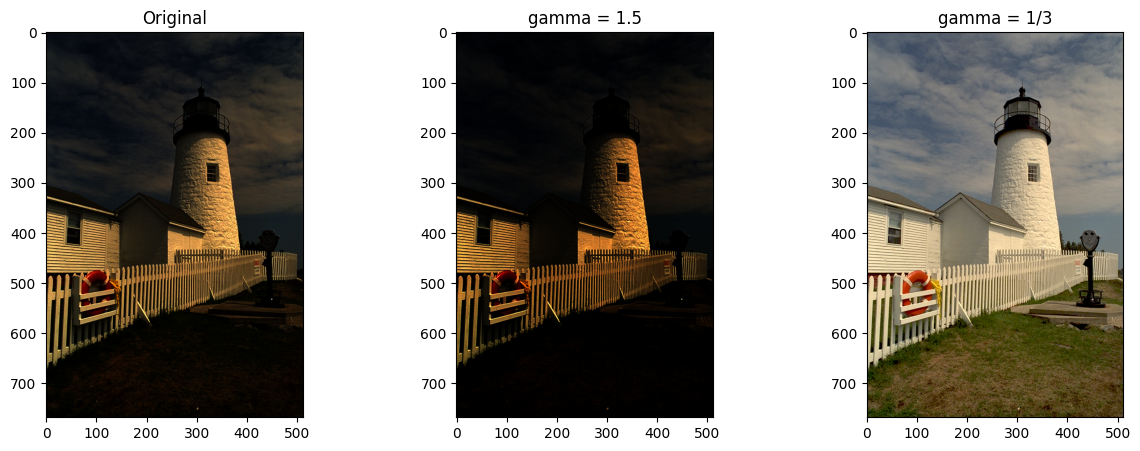

In [3]:
def gamma_correction(img, gamma):
    rows, cols, channels = img.shape
    out = np.zeros_like(img)
    for r in range(rows):
        for c in range(cols):
            for ch in range(channels):
                out[r, c, ch] = img[r, c, ch]**gamma
    return out

img = cv2.imread('data/dark.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)/255.0

plt.subplot(131), plt.imshow(img), plt.title('Original')
plt.subplot(132), plt.imshow(gamma_correction(img, gamma=1.5)), plt.title('gamma = 1.5')
plt.subplot(133), plt.imshow(gamma_correction(img, gamma=1/3)), plt.title('gamma = 1/3')

(<Axes: xlabel='input', ylabel='output'>,
 Text(0.5, 0, 'input'),
 Text(0, 0.5, 'output'),
 None)

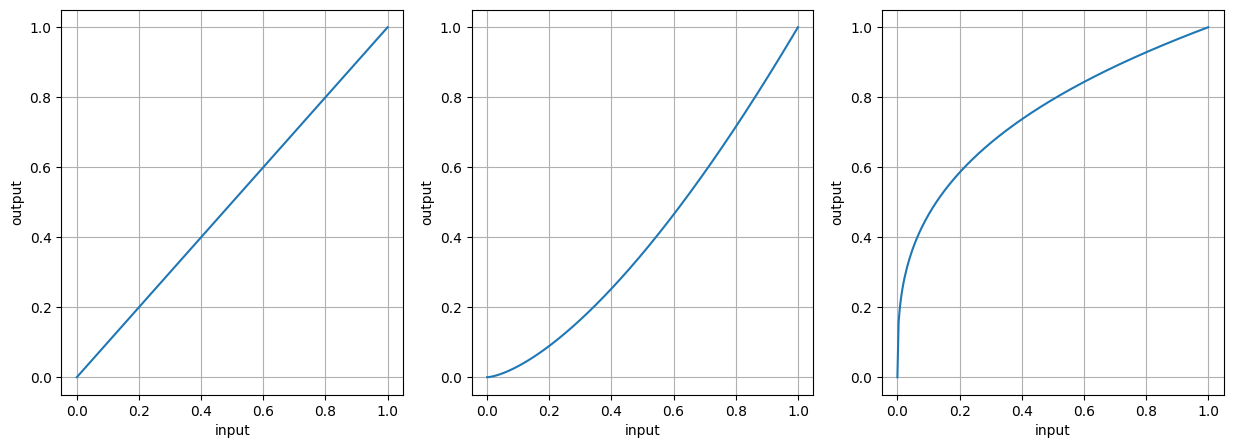

In [11]:
colors = np.arange(0, 256)/255
plt.subplot(131), plt.plot(colors, colors**1), plt.xlabel('input'), plt.ylabel('output'), plt.grid(True)
plt.subplot(132), plt.plot(colors, colors**1.5), plt.xlabel('input'), plt.ylabel('output'), plt.grid(True)
plt.subplot(133), plt.plot(colors, colors**(1/3)), plt.xlabel('input'), plt.ylabel('output'), plt.grid(True)

The gamma parameter controls the strength of contrast adjustments. It also controls what parts of dynamic range are going to be enhanced, i.e., dark tones (gamma < 1) or bright tones (gamma > 1).

(Text(0.5, 0, 'input'),
 Text(0, 0.5, 'output'),
 None,
 Text(0.5, 1.0, 'Human Eye'))

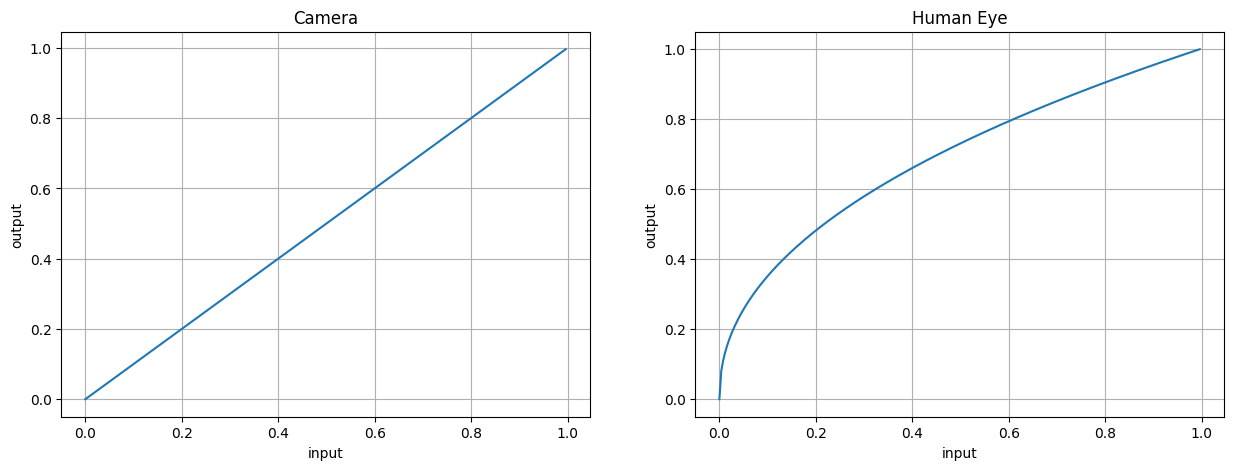

In [9]:
plt.subplot(121), plt.plot(colors, colors)
plt.xlabel('input'), plt.ylabel('output'), plt.grid(True), plt.title('Camera')

plt.subplot(122), plt.plot(colors, colors**(1/2.2))
plt.xlabel('input'), plt.ylabel('output'), plt.grid(True), plt.title('Human Eye')

### Image Quantization

We already know that cameras respond to illuminance changes **linearly**. This is not a problem since a monitor will show the image as camera *sees* it and we, humans, will perceive it as we normally do. However, using uint8 coding, the dynamic range of the image is split into 256 parts for encoding. Should we use a homogenous (linear) split or gamma corrected split? Let's have a look.

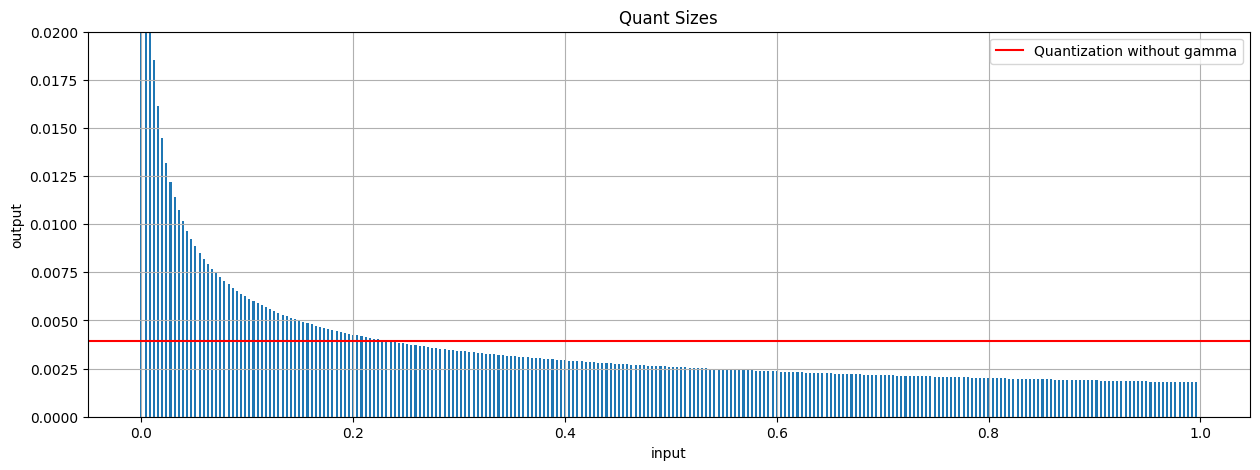

In [37]:
quants = colors**(1/2.2)
quants = quants[1:] - quants[0:-1]

plt.bar(colors[0:-1], quants, width=1/512), plt.ylim([0, 0.02])
plt.axhline(y=1/255, color='r', linestyle='-', label='Quantization without gamma')
plt.xlabel('input'), plt.ylabel('output'), plt.grid(True), plt.title('Quant Sizes')
plt.legend()

As you can see, using a linear split means that we lose colour resolution for darker tones (the quantization bins are larger that they should be) and we use excessive resolution for brighter tones (the quantization bins are unnecessarilly small). In other words, we waste bits for brighter tones and we do not have enough bits for darker tones. Therefore, quantization is always performed after gamma correction (with the appropriate gamma value corresponding to an average human eye).

In other words, the division of the dynamic range into 256 parts is *linear* from the human perception perspective (the tones seem equally spaced). This division, however, is not linear from the 